<a href="https://colab.research.google.com/github/2303a51105/AIML-2025/blob/main/Lab-5_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Registration with Titancic data set

##import packages and datasets

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns
%matplotlib inline
from google.colab import files

In [13]:
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [14]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
d=df.describe(percentiles=[.5,.75,.9])
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.columns, df.columns[0]

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 'PassengerId')

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##exploaratory analysis and plots

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

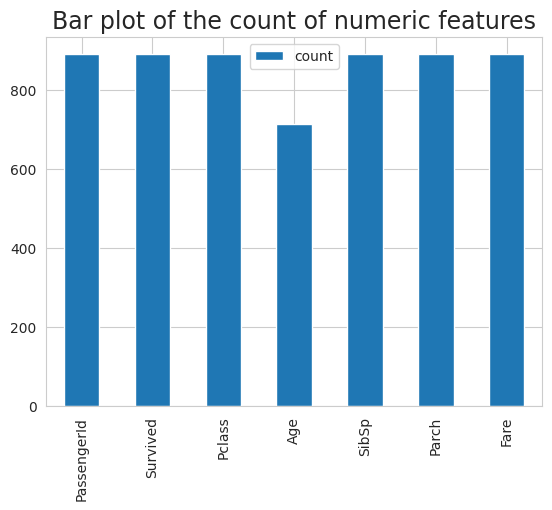

In [19]:
dT=d.T
dT.plot.bar(y='count')
pit.title("Bar plot of the count of numeric features",fontsize=17)

#check the relative size of survived and non-survived

<ipython-input-21-239f9a06b4eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

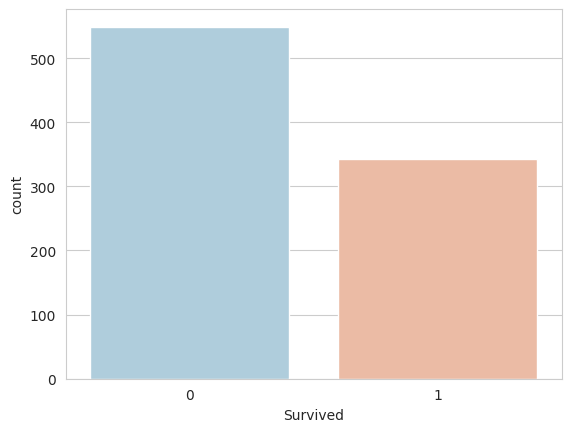

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')
#sns.pairplot(train)

**is there a pattern for the survivability based on sex?**

it looks like more females survied than males

<Axes: xlabel='Survived', ylabel='count'>

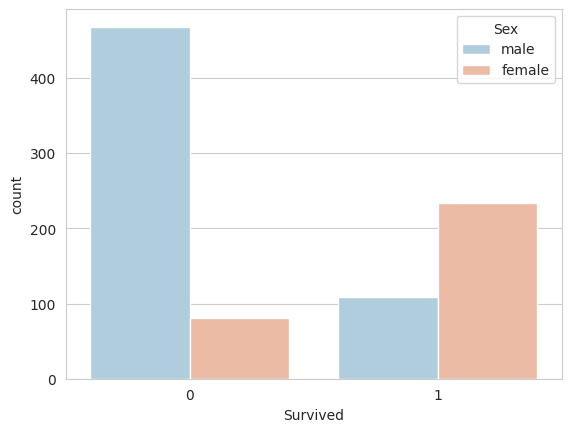

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=df,palette='RdBu_r')

**What about any pattern related to passenger class**

it look like disproportional large number odf 3rd class passengers died!

<Axes: xlabel='Survived', ylabel='count'>

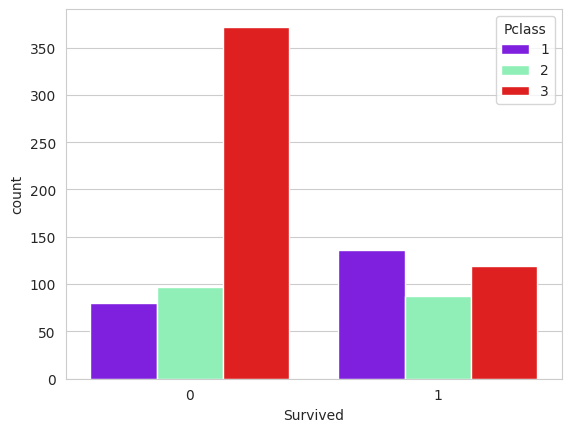

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=df,palette='rainbow')

**Following codes extract and plots the fraction of passenger count that survived by each class**

<ipython-input-24-6bbfc2376141>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=f_class_survived,palette='rainbow')


Text(0.5, 1.0, 'fraction of passengers survived by class')

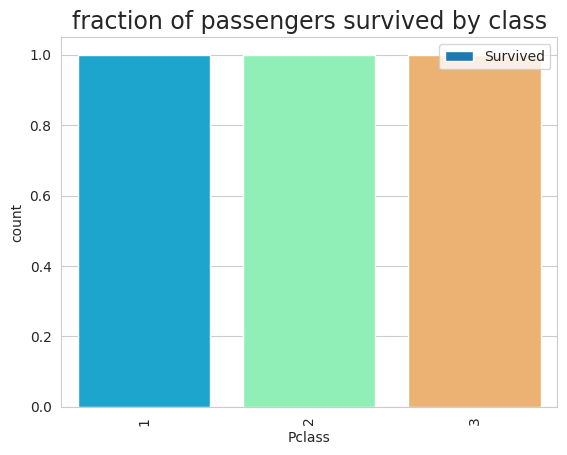

In [24]:
f_class_survived=df.groupby('Pclass')['Survived'].mean()
f_class_survived=pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
sns.countplot(x='Survived',data=f_class_survived,palette='rainbow')
pit.title("fraction of passengers survived by class",fontsize=17)

Text(0.5, 0, 'Passenger class')

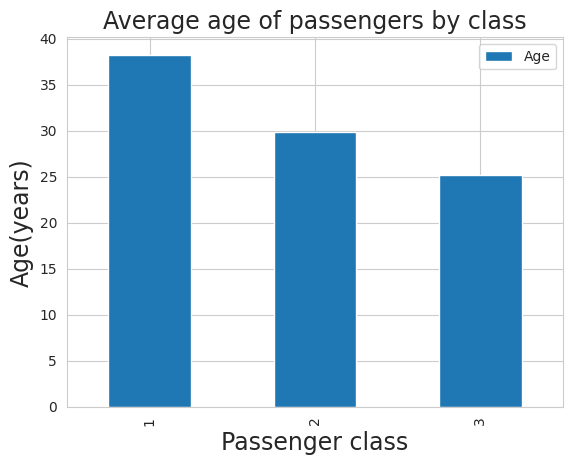

In [25]:
f_class_Age=df.groupby('Pclass')['Age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
pit.title("Average age of passengers by class",fontsize=17)
pit.ylabel("Age(years)",fontsize=17)
pit.xlabel("Passenger class",fontsize=17)

# Define a function to impute(fill up missing values) age feature

In [26]:
a=list(f_class_Age['Age'])
def impute_age(cols):
  age=cols[0]
  pclass=cols[1]
  if pd.isnull(age):
    if pclass==1:
      return a[0]
    elif pclass==2:
      return a[1]
    else:
      return a[2]
  else:
    return age

Apply the above defined function and plot the count of numeric features

<ipython-input-26-0f8a23e4c176>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
<ipython-input-26-0f8a23e4c176>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


Text(0.5, 1.0, 'Barplot of the count of numeric features')

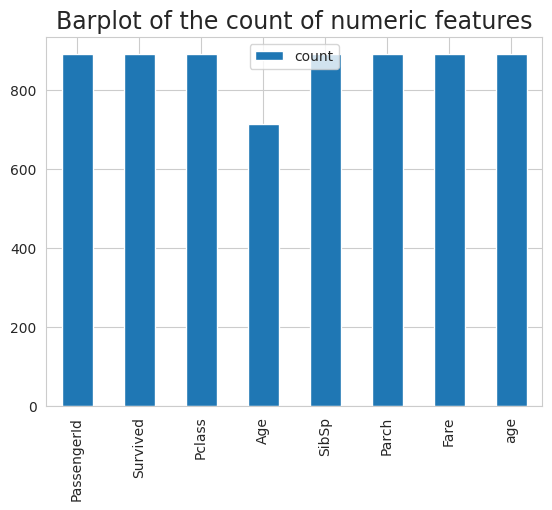

In [27]:
df['age']=df[['Age', 'Pclass']].apply(impute_age,axis=1)
d=df.describe()
dT=d.T
dT.plot.bar(y='count')
pit.title("Barplot of the count of numeric features",fontsize=17)

Drop the cabin feature and any other null value

In [29]:
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0


##Drop other unessary feature

In [30]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age
0,1,0,3,male,22.0,1,0,7.2500,S,22.0
1,2,1,1,female,38.0,1,0,71.2833,C,38.0
2,3,1,3,female,26.0,0,0,7.9250,S,26.0
3,4,1,1,female,35.0,1,0,53.1000,S,35.0
4,5,0,3,male,35.0,0,0,8.0500,S,35.0


##convert categorial feature like sex

**use pandas 'get_dummies()' function**

In [31]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

**Now drop the sex and embarked coloums and concatenate the new dummy variables


In [32]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df=pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,age,male,Q,S
0,1,0,3,22.0,1,0,7.2500,22.0,True,False,True
1,2,1,1,38.0,1,0,71.2833,38.0,False,False,False
2,3,1,3,26.0,0,0,7.9250,26.0,False,False,True
3,4,1,1,35.0,1,0,53.1000,35.0,False,False,True
4,5,0,3,35.0,0,0,8.0500,35.0,True,False,True
